In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#https://stackoverflow.com/questions/43102734/format-a-number-with-commas-to-separate-thousands#:~:text=To%20make%20all%20your%20floats%20show%20comma%20separators,set%20the%20following%3A%20pd.options.display.float_format%20%3D%20%27%20%7B%3A%2C%7D%27.format%20https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fversion%2F0.23.4%2Foptions.html
# display integers in thousands format
pd.options.display.float_format = '{:,}'.format

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

## QUESTION 2

    HAVING FOUND '?' CHARACTERS IN THE DATASET, THESE NONSENSE CHARACTER ARE BEING REPLACED WITH NaN CHARACTERS WHEN READING THE FILE INTO PANDAS.

In [3]:
# https://stackoverflow.com/questions/64957335/replace-question-mark-in-pandas-dataframe
df = pd.read_csv('automobile.txt', sep=',', na_values='?') #<== replace question mark with NaN
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,"5,000.0",21,27,"13,495.0"
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,"5,000.0",21,27,"16,500.0"
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,"5,000.0",19,26,"16,500.0"
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,"5,500.0",24,30,"13,950.0"
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,"5,500.0",18,22,"17,450.0"


    '?' CHARCTERS HAVE BEEN REMOVED.

## LETS GET AN OVERVIEW OF THE DATASET WITH describe() FUNCTION.

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.0,164.0,205.0,205.0,205.0,205.0,205.0,205.0,201.0,201.0,205.0,203.0,203.0,205.0,205.0,201.0
mean,0.8341463414634146,122.0,98.75658536585378,174.04926829268305,65.90780487804875,53.724878048780525,"2,555.5658536585365",126.90731707317073,3.3297512437810957,3.2554228855721337,10.142536585365855,104.25615763546799,"5,125.369458128079",25.21951219512195,30.75121951219512,"13,207.129353233831"
std,1.24530682810553,35.442167530553256,6.021775685025572,12.337288526555186,2.1452038526871817,2.4435219699049044,520.6802035016389,41.642693438179826,0.2735387318295989,0.31671745337703117,3.972040321863297,39.71436878679359,479.3345598334165,6.54214165300162,6.88644313094182,"7,947.066341939271"
min,-2.0,65.0,86.6,141.1,60.3,47.8,"1,488.0",61.0,2.54,2.07,7.0,48.0,"4,150.0",13.0,16.0,"5,118.0"
25%,0.0,94.0,94.5,166.3,64.1,52.0,"2,145.0",97.0,3.15,3.11,8.6,70.0,"4,800.0",19.0,25.0,"7,775.0"
50%,1.0,115.0,97.0,173.2,65.5,54.1,"2,414.0",120.0,3.31,3.29,9.0,95.0,"5,200.0",24.0,30.0,"10,295.0"
75%,2.0,150.0,102.4,183.1,66.9,55.5,"2,935.0",141.0,3.59,3.41,9.4,116.0,"5,500.0",30.0,34.0,"16,500.0"
max,3.0,256.0,120.9,208.1,72.3,59.8,"4,066.0",326.0,3.94,4.17,23.0,288.0,"6,600.0",49.0,54.0,"45,400.0"


## GETTING MORE DETAILED INFORMATION ON THE DATASET WITH info() FUNCTION, INCLUDING DATATYPE AND AN IDEA OF WHERE NaN VALUES ARE IN THE DATA.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Columns with Missing Values Listed by Column Headings
 
- normalized-losses  (164 non-null)    = 41
- num-of-doors       (203 non-null)    = 2 
- bore               (201 non-null)    = 4
- stroke             (201 non-null)    = 4
- horsepower         (203 non-null)    = 2
- peak-rpm           (203 non-null)    = 2
- price              (201 non-null)    = 4

## USING unique() FUNCTION TO GET COLUMN HEADINGS WITH INFORMATION ON HOW MANY DISTINCT VALUES ARE IN EACH COLUMN.

In [6]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

## USING list() FUNCTION TO LIST JUST THE COLUMN HEADINGS.

In [7]:
list(df)

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

## USING isnull().sum().sum() TO ADD UP THE TOTAL NUMBER OF NaN VALUES IN THE DATASET.

In [8]:
# https://datatofish.com/check-nan-pandas-dataframe/
# list of NaN values
df.isnull().sum().sum()

59

## IDENTIFYING/CONFIRMING THAT MOST OF THE NaN VALUES ARE IN THE 'NORMALISED-LOSSES' COLUMN: 41 OUT OF 59 NaN VALUES ARE IN THE 'NORMALISED-LOSSES' COLUMN.

In [9]:
df['normalized-losses'].isnull().sum()

41

## PRINT OUT THE df DATAFRAME TABLE.

In [10]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,"5,000.0",21,27,"13,495.0"
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,"5,000.0",21,27,"16,500.0"
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,"5,000.0",19,26,"16,500.0"
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,"5,500.0",24,30,"13,950.0"
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,"5,500.0",18,22,"17,450.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,"5,400.0",23,28,"16,845.0"
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,"5,300.0",19,25,"19,045.0"
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,"5,500.0",18,23,"21,485.0"
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106.0,"4,800.0",26,27,"22,470.0"


## Finding the  meaning of "Symboling"...
  

    https://archive.ics.uci.edu/ml/datasets/Automobile
    
    Data Set Information:

"This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process **"symboling"**. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe."

## REMOVE DUPLICATE VALUES

In [11]:
#REMOVE DUPLLICATE ROWS
df[df.duplicated()]
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## THERE WERE NO DUPLICATE ROWS. ABOVE I SAW 205 ENTRIES IN THE DATASET. THERE ARE STILL 205 ENTRIES.

## BEFORE PROCEEDING I NEED TO DECIDE WHAT QUESTIONS TO ANSWER IN ORDER TO FOCUS ON CLEANING THE RELEVANT COLUMNS.

- VISUALISE THE 'price' COLUMN
- VISUALISE THE 'horsepower' COLUMN
- VISUALISE THE 'fuel' COLUMN

## CAR PRICE DISTRIBUTION

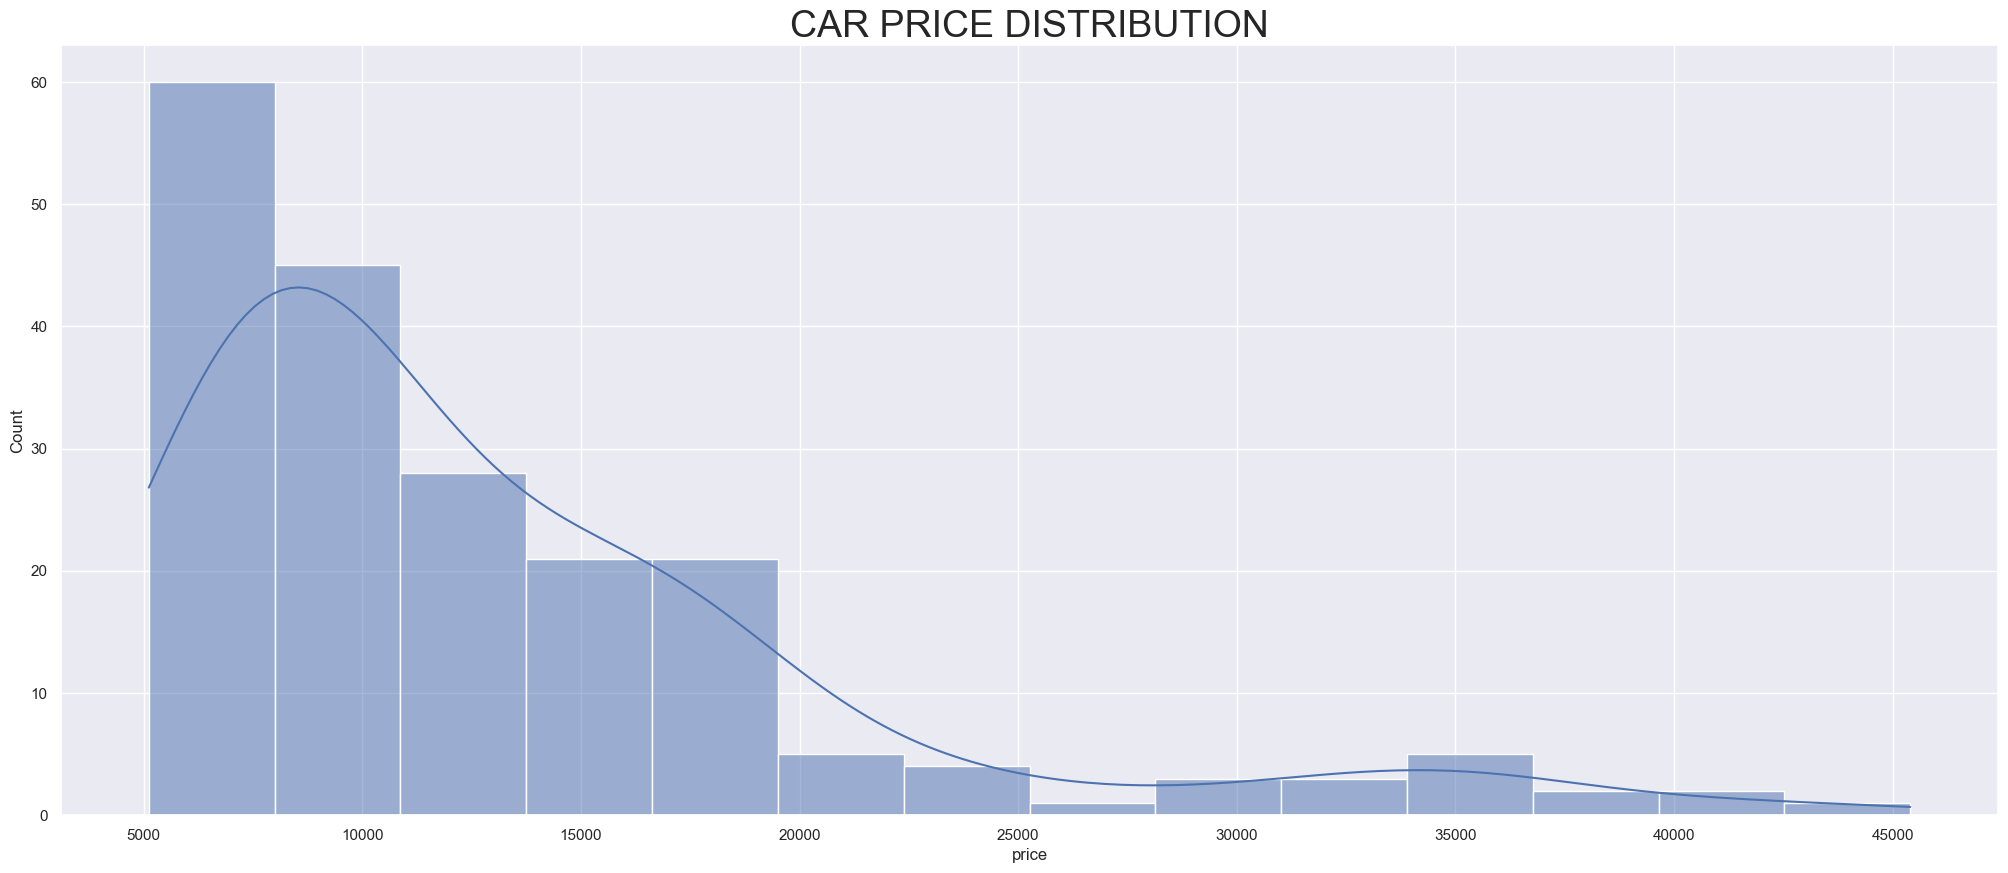

In [19]:


sns.histplot(df.price, kde=True)
# https://www.statology.org/seaborn-background-color/#:~:text=How%20to%20Change%20Background%20Color%20in%20Seaborn%20You,in%20practice.%20Example%3A%20Change%20Background%20Color%20in%20Seaborn
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})
sns.set(rc={"figure.figsize":(25, 10)}) #width=25, height=10

plt.title('CAR PRICE DISTRIBUTION', fontsize=27)
plt.show()

## THERE IS A SURPRISINGLY LARGE DISTRIBUTION OF CAR PRICES AT THE LOWER END OF THE SCALE.

- Most car prices are located below the 20,000 value.
- It is not surprising that lower value cars are more popular because they are more affordable.
- It is surprising that the lowest priced cars make up so much of the total because they are often made to a price and can be unreliable or underpowered.
- It would be interesting to look at the power of the cars in the dataset.

## CAR POWER DISTRIBUTION

Text(0.5, 1.0, 'CAR HORSEPOWER DISTRIBUTION')

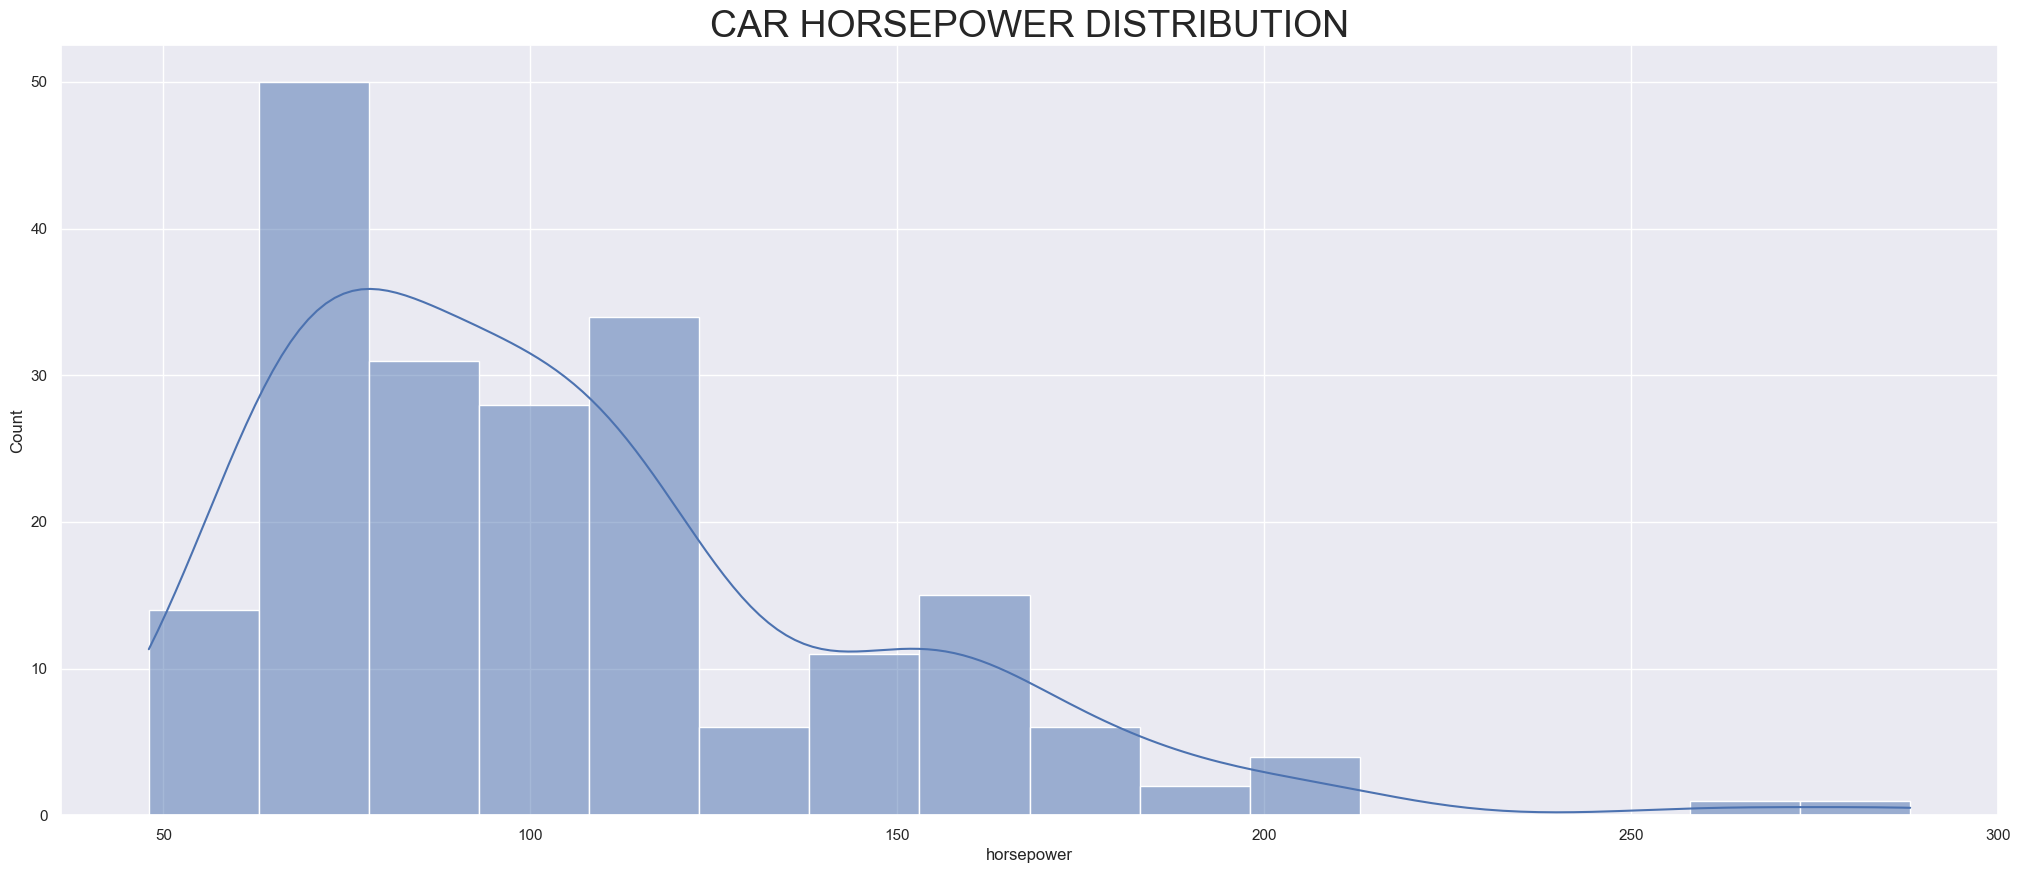

In [20]:
sns.histplot(df.horsepower, kde=True)

sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})  #<== It did not turn 'green' this time?
sns.set(rc={"figure.figsize":(25, 10)}) #width=25, height=10
plt.title('CAR HORSEPOWER DISTRIBUTION', fontsize=27)

#plt.show()

## CAR FUEL-TYPE DISTRIBUTION

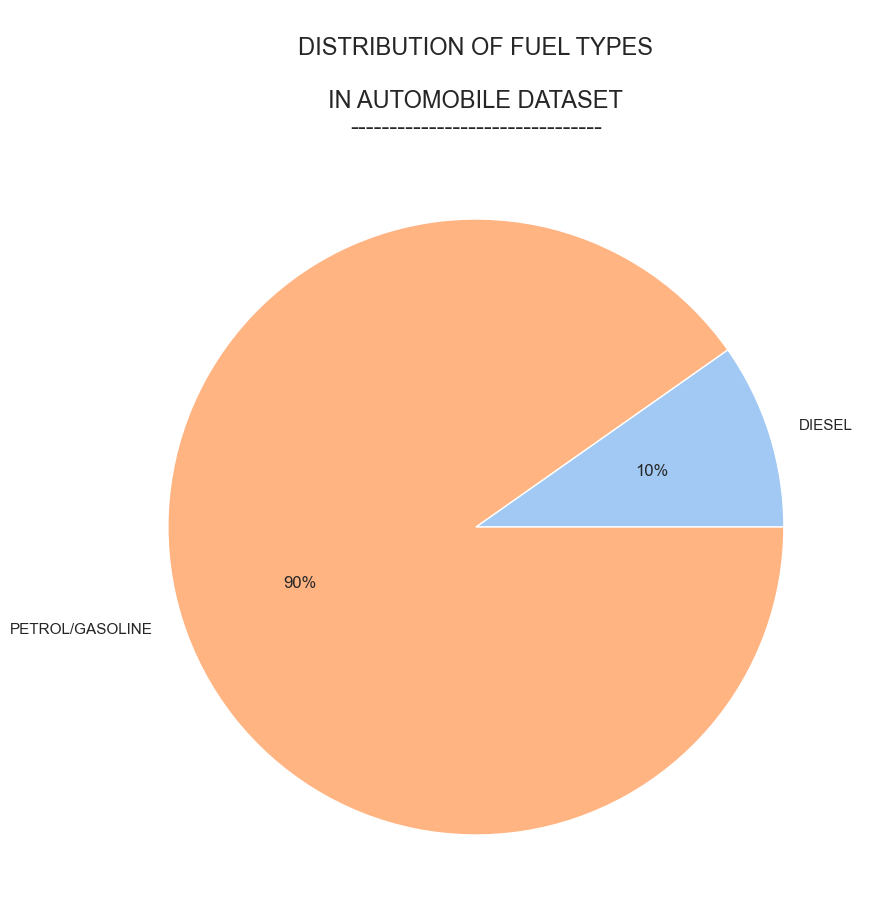

In [14]:

# https://www.statology.org/seaborn-pie-chart/
data = df['fuel-type'].groupby(df['fuel-type']).count() # groupby() and count() fuel-type distribution
labels = ['DIESEL', 'PETROL/GASOLINE']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('''
DISTRIBUTION OF FUEL TYPES

IN AUTOMOBILE DATASET
--------------------------------''', fontsize=17)
plt.show()

In [15]:
df['fuel-type'].groupby(df['fuel-type']).count()


fuel-type
diesel     20
gas       185
Name: fuel-type, dtype: int64

    CHECKING THAT THE LABELS HAVE THE CORRECT VALUES FOR DIESEL/PETROL, IT CAN BE SEEN THAT PETROL/GAS IS THE PREDOMINANT FUEL-TYPE.